In [45]:
import numpy as np
import pandas as pd 

## load dataset

In [3]:
df=pd.read_csv('IMDB Dataset.csv')

In [4]:
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [5]:
df['review'][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

# **text cleaning**

1.sampling 10000 reviews from 50000<br>
2.remove html tags<br>
3.remove special chatracters<br>
4.converting everything to lower case<br>
5.removing stop words(and,the....)<br>
6.stemming(play,playing,played->play)<br>

In [6]:
df=df.sample(1000)

In [7]:
df.shape

(1000, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 41974 to 49730
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     1000 non-null   object
 1   sentiment  1000 non-null   object
dtypes: object(2)
memory usage: 23.4+ KB


In [48]:
df['sentiment'].replace({'positive':1,'negative':0},inplace=True)

C:\Users\JAYAPRIYA\AppData\Local\Temp\ipykernel_3056\4240984564.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['sentiment'].replace({'positive':1,'negative':0},inplace=True)
C:\Users\JAYAPRIYA\AppData\Local\Temp\ipykernel_3056\4240984564.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df

In [9]:
df.head()

,review,sentiment
41974,"Grand epic as it is, Kenneth Branagh's monumen...",positive
6999,I watched the Unrated version of this film and...,negative
14573,"I already loved ""How the Grinch Stole Christma...",positive
42721,i LOVED THIS MOVIEE well i loved the romance p...,positive
12288,"Since I watched it for the first time, ""Piedra...",positive


In [12]:
import re
clean=re.compile('<.*?>')
re.sub(clean,'',df.iloc[1].review)

"I watched the Unrated version of this film and realised about 30 minutes into it that I was never getting my time back. I persevered to the end hoping that the dialogue would improve, the martial arts would look realistic eventually, the special FX would actually look special. I was so wrong. I love Horror, I am a complete gore hound. I number some of the eighties splatter flicks amongst the greats of the film world. This however was not made in the eighties, if this film had come out in the early eighties the fax could be forgiven for looking so bad. It wasn't so it hasn't got that defence. The dialogue is terrible with so many bad lines I was wincing at the writing rather than squirming at torture. I don't like Hostel, never have, I thought it was over rated, over hyped and I felt nothing for the protagonists, however it shines as a beacon to greatness next to this garbage. The back of the cover for Live Feed promised a twist you would never see coming, I'm still waiting for the twi

In [13]:
#function to clean html tags
def clean_html(text):
    clean=re.compile('<.*?>')
    return re.sub(clean,'',text)

In [14]:
df['review']=df['review'].apply(clean_html)

In [15]:
df['review']

41974    Grand epic as it is, Kenneth Branagh's monumen...
6999     I watched the Unrated version of this film and...
14573    I already loved "How the Grinch Stole Christma...
42721    i LOVED THIS MOVIEE well i loved the romance p...
12288    Since I watched it for the first time, "Piedra...
                               ...                        
37675    I had never heard of this film and only got it...
30623    This show makes me(and many others) hate their...
26594    A kinda remake of PLANES TRAINS AND AUTOMOBILE...
9750     Wow! It's hard to put into words my feelings f...
49730    Wow, the spookiest thing about this episode wa...
Name: review, Length: 1000, dtype: object

In [16]:
#convert to lower
def lowerconv(text):
    return text.lower()


In [17]:
df['review']=df['review'].apply(lowerconv)

In [18]:
#function to remove special characters
def remove_special(text):
    X=''
    for i in text:
        if i.isalnum():
            X=X+i
        else:
            X=X+' '
    return X
                    
        
            

In [19]:
df['review']=df['review'].apply(remove_special)

In [20]:
df.head()

,review,sentiment
41974,grand epic as it is kenneth branagh s monumen...,positive
6999,i watched the unrated version of this film and...,negative
14573,i already loved how the grinch stole christma...,positive
42721,i loved this moviee well i loved the romance p...,positive
12288,since i watched it for the first time piedra...,positive


In [21]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [22]:
#removing stop words
import nltk
from nltk.corpus import stopwords

In [23]:
stopwords.words('english')

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [24]:
def remove_stopwords(text):
    x=[]
    for i in text.split():
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y


In [25]:
df['review']=df['review'].apply(remove_stopwords)

In [26]:
df.head()

,review,sentiment
41974,"[grand, epic, kenneth, branagh, monumental, re...",positive
6999,"[watched, unrated, version, film, realised, 30...",negative
14573,"[already, loved, grinch, stole, christmas, rel...",positive
42721,"[loved, moviee, well, loved, romance, part, co...",positive
12288,"[since, watched, first, time, piedras, persona...",positive


In [66]:
#perform steming 
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [67]:
y=[]
def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return z

In [68]:
df['review']=df['review'].apply(stem_words)

In [69]:
df.head()

,review,sentiment
31108,"[went, hope, would, thought, provok, littl, ge...",0
36070,"[doubt, kokoda, trail, depict, truli, great, e...",0
31229,"[fan, bela, lugosi, bori, karloff, lon, chaney...",0
47375,"[unlik, bond, detect, movi, alfr, hitchcock, h...",1
15868,"[even, say, film, sebastien, work, best, tell,...",0


In [27]:
def join_back(list_input):
    return " ".join(list_input)

In [28]:
df['review']=df['review'].apply(join_back)

In [29]:
df

,review,sentiment
41974,grand epic kenneth branagh monumental renderin...,positive
6999,watched unrated version film realised 30 minut...,negative
14573,already loved grinch stole christmas released ...,positive
42721,loved moviee well loved romance part colby gir...,positive
12288,since watched first time piedras personal favo...,positive
...,...,...
37675,never heard film got martin sheen fan stunned ...,positive
30623,show makes many others hate lives let face zoe...,negative
26594,kinda remake planes trains automobiles lot way...,positive
9750,wow hard put words feelings episode ice one be...,positive


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

In [31]:
x=cv.fit_transform(df['review']).toarray()

In [32]:
x.shape

(1000, 18033)

In [33]:
y=df.iloc[:,-1].values

In [34]:
y.shape

(1000,)

## spiliting training and test set

In [35]:
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [36]:
x_train.shape

(750, 18033)

## build a model

In [37]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [38]:
clf1=GaussianNB()
clf2=MultinomialNB()
clf3=BernoulliNB()

In [39]:
clf1.fit(x_train,y_train)
clf2.fit(x_train,y_train)
clf3.fit(x_train,y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [40]:
ypred1=clf1.predict(x_test)
ypred2=clf2.predict(x_test)
ypred3=clf3.predict(x_test)


In [41]:
from sklearn.metrics import accuracy_score

In [42]:
print(f"multinomialNB: {accuracy_score(y_test,ypred2)}")

multinomialNB: 0.812


In [44]:
print(f"multinomialNB: {accuracy_score(y_test,ypred3)}")

multinomialNB: 0.796


In [46]:
from sklearn.metrics import ConfusionMatrixDisplay

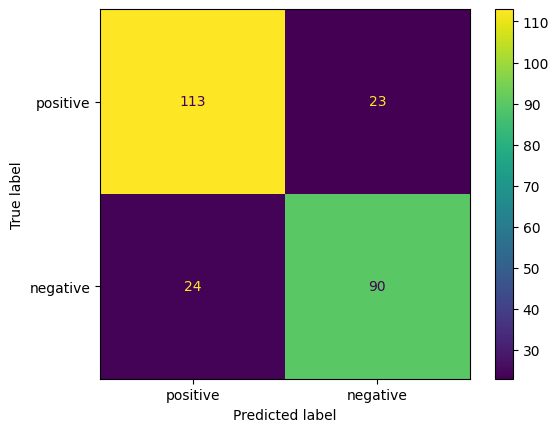

In [47]:
ConfusionMatrixDisplay.from_estimator(clf2,x_test,y_test,display_labels=["positive","negative"])